In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
dataset = pd.read_csv("datasets/2022_soil_weather_upgraded_data.csv")
dataset

,Date,Time,SM_4,SM_INI,ST_4,temp,humidity,precip,windspeed,cloudcover,conditions
0,01-01-2022,00:00,35.9,35.9,15.5,21.6,84.50,0.0,22.3,100.0,Overcast
1,01-01-2022,01:00,36.0,35.9,15.6,21.6,84.97,0.0,27.7,91.7,Overcast
2,01-01-2022,02:00,36.0,35.9,15.6,21.2,86.87,0.0,22.8,62.7,Partially cloudy
3,01-01-2022,03:00,35.8,35.9,15.7,21.2,86.66,0.0,22.8,91.7,Overcast
4,01-01-2022,04:00,35.9,36.0,15.7,21.6,84.50,0.0,19.8,100.0,Overcast
...,...,...,...,...,...,...,...,...,...,...,...
8755,31-12-2022,19:00,36.5,36.7,10.1,14.7,77.19,0.0,0.0,37.3,Partially cloudy
8756,31-12-2022,20:00,36.2,36.6,10.0,12.5,90.76,0.0,4.0,36.2,Partially cloudy
8757,31-12-2022,21:00,36.1,36.5,9.9,11.4,93.88,0.0,5.6,20.4,Partially cloudy
8758,31-12-2022,22:00,36.1,36.5,9.7,10.7,96.47,0.0,0.0,37.3,Partially cloudy


In [3]:
dataset.columns

Index(['Date', 'Time', 'SM_4', 'SM_INI', 'ST_4', 'temp', 'humidity', 'precip',
       'windspeed', 'cloudcover', 'conditions'],
      dtype='object')

In [4]:
dataset.__len__()

8760

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        8760 non-null   object 
 1   Time        8760 non-null   object 
 2   SM_4        8760 non-null   float64
 3   SM_INI      8760 non-null   float64
 4   ST_4        8760 non-null   float64
 5   temp        8759 non-null   float64
 6   humidity    8759 non-null   float64
 7   precip      8759 non-null   float64
 8   windspeed   8759 non-null   float64
 9   cloudcover  8759 non-null   float64
 10  conditions  8759 non-null   object 
dtypes: float64(8), object(3)
memory usage: 752.9+ KB


In [6]:
dataset.__len__()

8760

In [7]:
dataset

,Date,Time,SM_4,SM_INI,ST_4,temp,humidity,precip,windspeed,cloudcover,conditions
0,01-01-2022,00:00,35.9,35.9,15.5,21.6,84.50,0.0,22.3,100.0,Overcast
1,01-01-2022,01:00,36.0,35.9,15.6,21.6,84.97,0.0,27.7,91.7,Overcast
2,01-01-2022,02:00,36.0,35.9,15.6,21.2,86.87,0.0,22.8,62.7,Partially cloudy
3,01-01-2022,03:00,35.8,35.9,15.7,21.2,86.66,0.0,22.8,91.7,Overcast
4,01-01-2022,04:00,35.9,36.0,15.7,21.6,84.50,0.0,19.8,100.0,Overcast
...,...,...,...,...,...,...,...,...,...,...,...
8755,31-12-2022,19:00,36.5,36.7,10.1,14.7,77.19,0.0,0.0,37.3,Partially cloudy
8756,31-12-2022,20:00,36.2,36.6,10.0,12.5,90.76,0.0,4.0,36.2,Partially cloudy
8757,31-12-2022,21:00,36.1,36.5,9.9,11.4,93.88,0.0,5.6,20.4,Partially cloudy
8758,31-12-2022,22:00,36.1,36.5,9.7,10.7,96.47,0.0,0.0,37.3,Partially cloudy


In [8]:
dataset.drop(
    [
        "Date",
        "SM_2",
        "SM_8",
        "SM_20",
        "SM_40",
        "ST_2",
        "ST_8",
        "ST_20",
        "ST_40",
        "solarenergy",
        "precipprob",
        "preciptype",
        "snow",
        "snowdepth",
        "windgust",
        "winddir",
        "sealevelpressure",
        "visibility",
        "solarenergy",
        "uvindex",
        "severerisk",
        "icon",
        "stations",
        "dew",
        "solarradiation",
        "Time",
        # "cloudcover",
        "feelslike",
        # "windspeed",
    ],
    inplace=True,
    axis=1,
)

KeyError: "['SM_2', 'SM_8', 'SM_20', 'SM_40', 'ST_2', 'ST_8', 'ST_20', 'ST_40', 'solarenergy', 'precipprob', 'preciptype', 'snow', 'snowdepth', 'windgust', 'winddir', 'sealevelpressure', 'visibility', 'solarenergy', 'uvindex', 'severerisk', 'icon', 'stations', 'dew', 'solarradiation', 'feelslike'] not found in axis"

In [9]:
dataset

,Date,Time,SM_4,SM_INI,ST_4,temp,humidity,precip,windspeed,cloudcover,conditions
0,01-01-2022,00:00,35.9,35.9,15.5,21.6,84.50,0.0,22.3,100.0,Overcast
1,01-01-2022,01:00,36.0,35.9,15.6,21.6,84.97,0.0,27.7,91.7,Overcast
2,01-01-2022,02:00,36.0,35.9,15.6,21.2,86.87,0.0,22.8,62.7,Partially cloudy
3,01-01-2022,03:00,35.8,35.9,15.7,21.2,86.66,0.0,22.8,91.7,Overcast
4,01-01-2022,04:00,35.9,36.0,15.7,21.6,84.50,0.0,19.8,100.0,Overcast
...,...,...,...,...,...,...,...,...,...,...,...
8755,31-12-2022,19:00,36.5,36.7,10.1,14.7,77.19,0.0,0.0,37.3,Partially cloudy
8756,31-12-2022,20:00,36.2,36.6,10.0,12.5,90.76,0.0,4.0,36.2,Partially cloudy
8757,31-12-2022,21:00,36.1,36.5,9.9,11.4,93.88,0.0,5.6,20.4,Partially cloudy
8758,31-12-2022,22:00,36.1,36.5,9.7,10.7,96.47,0.0,0.0,37.3,Partially cloudy


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        8760 non-null   object 
 1   Time        8760 non-null   object 
 2   SM_4        8760 non-null   float64
 3   SM_INI      8760 non-null   float64
 4   ST_4        8760 non-null   float64
 5   temp        8759 non-null   float64
 6   humidity    8759 non-null   float64
 7   precip      8759 non-null   float64
 8   windspeed   8759 non-null   float64
 9   cloudcover  8759 non-null   float64
 10  conditions  8759 non-null   object 
dtypes: float64(8), object(3)
memory usage: 752.9+ KB


In [11]:
dataset = dataset.dropna()

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8759 entries, 0 to 8759
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        8759 non-null   object 
 1   Time        8759 non-null   object 
 2   SM_4        8759 non-null   float64
 3   SM_INI      8759 non-null   float64
 4   ST_4        8759 non-null   float64
 5   temp        8759 non-null   float64
 6   humidity    8759 non-null   float64
 7   precip      8759 non-null   float64
 8   windspeed   8759 non-null   float64
 9   cloudcover  8759 non-null   float64
 10  conditions  8759 non-null   object 
dtypes: float64(8), object(3)
memory usage: 821.2+ KB


In [13]:
dataset.columns

Index(['Date', 'Time', 'SM_4', 'SM_INI', 'ST_4', 'temp', 'humidity', 'precip',
       'windspeed', 'cloudcover', 'conditions'],
      dtype='object')

In [14]:
Categorical_unique_conditions = dataset.conditions.unique()
print(Categorical_unique_conditions)
print(len(Categorical_unique_conditions))

['Overcast' 'Partially cloudy' 'Rain, Partially cloudy' 'Rain, Overcast'
 'Snow, Rain, Overcast' 'Snow, Rain, Partially cloudy' 'Clear'
 'Snow, Overcast' 'Rain']
9


In [15]:
dataset

,Date,Time,SM_4,SM_INI,ST_4,temp,humidity,precip,windspeed,cloudcover,conditions
0,01-01-2022,00:00,35.9,35.9,15.5,21.6,84.50,0.0,22.3,100.0,Overcast
1,01-01-2022,01:00,36.0,35.9,15.6,21.6,84.97,0.0,27.7,91.7,Overcast
2,01-01-2022,02:00,36.0,35.9,15.6,21.2,86.87,0.0,22.8,62.7,Partially cloudy
3,01-01-2022,03:00,35.8,35.9,15.7,21.2,86.66,0.0,22.8,91.7,Overcast
4,01-01-2022,04:00,35.9,36.0,15.7,21.6,84.50,0.0,19.8,100.0,Overcast
...,...,...,...,...,...,...,...,...,...,...,...
8755,31-12-2022,19:00,36.5,36.7,10.1,14.7,77.19,0.0,0.0,37.3,Partially cloudy
8756,31-12-2022,20:00,36.2,36.6,10.0,12.5,90.76,0.0,4.0,36.2,Partially cloudy
8757,31-12-2022,21:00,36.1,36.5,9.9,11.4,93.88,0.0,5.6,20.4,Partially cloudy
8758,31-12-2022,22:00,36.1,36.5,9.7,10.7,96.47,0.0,0.0,37.3,Partially cloudy


In [16]:
dataset.drop(
    [
        "Date",
        "Time",
    ],
    axis=1,
    inplace=True,
)

C:\Users\ganes\AppData\Local\Temp\ipykernel_3284\925067263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(


In [17]:
dataset

,SM_4,SM_INI,ST_4,temp,humidity,precip,windspeed,cloudcover,conditions
0,35.9,35.9,15.5,21.6,84.50,0.0,22.3,100.0,Overcast
1,36.0,35.9,15.6,21.6,84.97,0.0,27.7,91.7,Overcast
2,36.0,35.9,15.6,21.2,86.87,0.0,22.8,62.7,Partially cloudy
3,35.8,35.9,15.7,21.2,86.66,0.0,22.8,91.7,Overcast
4,35.9,36.0,15.7,21.6,84.50,0.0,19.8,100.0,Overcast
...,...,...,...,...,...,...,...,...,...
8755,36.5,36.7,10.1,14.7,77.19,0.0,0.0,37.3,Partially cloudy
8756,36.2,36.6,10.0,12.5,90.76,0.0,4.0,36.2,Partially cloudy
8757,36.1,36.5,9.9,11.4,93.88,0.0,5.6,20.4,Partially cloudy
8758,36.1,36.5,9.7,10.7,96.47,0.0,0.0,37.3,Partially cloudy


In [18]:
X = dataset.iloc[:, 1:].values
X

array([[35.9, 15.5, 21.6, ..., 22.3, 100.0, 'Overcast'],
       [35.9, 15.6, 21.6, ..., 27.7, 91.7, 'Overcast'],
       [35.9, 15.6, 21.2, ..., 22.8, 62.7, 'Partially cloudy'],
       ...,
       [36.5, 9.9, 11.4, ..., 5.6, 20.4, 'Partially cloudy'],
       [36.5, 9.7, 10.7, ..., 0.0, 37.3, 'Partially cloudy'],
       [36.2, 9.6, 10.1, ..., 7.0, 79.0, 'Partially cloudy']],
      dtype=object)

In [19]:
y = dataset.iloc[:, 0].values
y

array([35.9, 36. , 36. , ..., 36.1, 36.1, 36. ])

In [20]:
""" taking care of categorical data in conditions column """
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    transformers=[("encoder", OneHotEncoder(), [-1])], remainder="passthrough"
)
X = np.array(ct.fit_transform(X))
X

array([[0.0, 1.0, 0.0, ..., 0.0, 22.3, 100.0],
       [0.0, 1.0, 0.0, ..., 0.0, 27.7, 91.7],
       [0.0, 0.0, 1.0, ..., 0.0, 22.8, 62.7],
       ...,
       [0.0, 0.0, 1.0, ..., 0.0, 5.6, 20.4],
       [0.0, 0.0, 1.0, ..., 0.0, 0.0, 37.3],
       [0.0, 0.0, 1.0, ..., 0.0, 7.0, 79.0]], dtype=object)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=0
)

In [22]:
print("X_train shape = ", X_train.shape)
print("y_train shape = ", y_train.shape)

X_train shape =  (7445, 16)
y_train shape =  (7445,)


In [23]:
print("X_test shape = ", X_test.shape)
print("y_test shape = ", y_test.shape)

X_test shape =  (1314, 16)
y_test shape =  (1314,)


In [24]:
X_train[0]

array([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.7, 27.5, 33.8,
       57.1, 0.0, 8.3, 85.2], dtype=object)

In [25]:
y_train[0]

20.9

In [26]:
""" Scaling data """
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_train[:, 9:] = sc.fit_transform(X_train[:, 9:])
X_test[:, 9:] = sc.transform(X_test[:, 9:])
X_train[0]

array([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0035842293906809264,
       0.9045936395759717, 0.9559386973180075, 0.4968922246980181, 0.0,
       0.1930232558139535, 0.8520000000000001], dtype=object)

In [27]:
X_train[0]

array([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0035842293906809264,
       0.9045936395759717, 0.9559386973180075, 0.4968922246980181, 0.0,
       0.1930232558139535, 0.8520000000000001], dtype=object)

In [28]:
X_train[0].shape

(16,)

In [29]:
X_train = np.asarray(X_train).astype("float32")
y_train = np.asarray(y_train).astype("float32")

<h1>ANN model </h1>


In [30]:
X_test = np.asarray(X_test).astype("float32")
y_test = np.asarray(y_test).astype("float32")


Epoch 1/100


233/233 [==============================] - 2s 3ms/step - loss: 511.6320 - mean_absolute_error: 19.1494 - val_loss: 30.1920 - val_mean_absolute_error: 4.6328
Epoch 2/100
233/233 [==============================] - 0s 1ms/step - loss: 17.1841 - mean_absolute_error: 3.3959 - val_loss: 7.2235 - val_mean_absolute_error: 2.1297
Epoch 3/100
233/233 [==============================] - 0s 1ms/step - loss: 4.2251 - mean_absolute_error: 1.5640 - val_loss: 3.1137 - val_mean_absolute_error: 1.2153
Epoch 4/100
233/233 [==============================] - 0s 1ms/step - loss: 2.2873 - mean_absolute_error: 1.0572 - val_loss: 2.1748 - val_mean_absolute_error: 0.8950
Epoch 5/100
233/233 [==============================] - 0s 1ms/step - loss: 1.6097 - mean_absolute_error: 0.7855 - val_loss: 1.7706 - val_mean_absolute_error: 0.6862
Epoch 6/100
233/233 [==============================] - 0s 1ms/step - loss: 1.3494 - mean_absolute_error: 0.6401 - val_loss: 1.6259 - val_mean_absolute_error: 0.5882
Ep

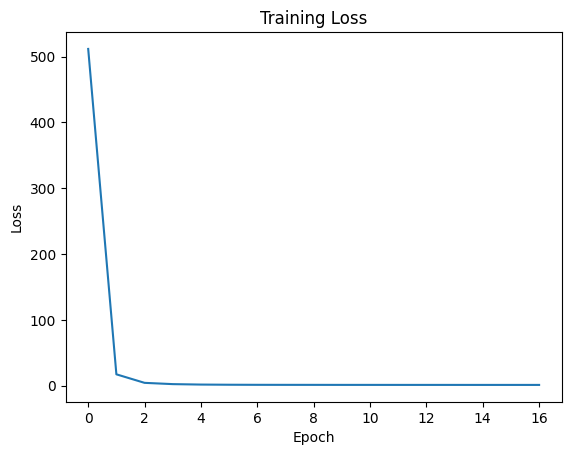

In [31]:
""" Model """
ANN_model = keras.Sequential(
    [
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dense(16, activation="relu"),
        keras.layers.Dense(8, activation="relu"),
        keras.layers.Dense(4, activation="relu"),
        keras.layers.Dense(2, activation="relu"),
        keras.layers.Dense(1),
    ]
)

ANN_model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.mean_squared_error,
    metrics=keras.metrics.mean_absolute_error,
)
early_stopping = EarlyStopping(patience=5)
history = ANN_model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
)

ANN_model.summary()

plt.plot(history.history["loss"])
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [32]:
ann_ypred = ANN_model.predict(X_test)


annMAE = mean_absolute_error(y_test, ann_ypred)


annMSE = mean_squared_error(y_test, ann_ypred)

ann_r2 = r2_score(y_test, ann_ypred)


print("mean absolute error = ", annMAE)
print("mean Squared error = ", annMSE)
print("r2 score = ", ann_r2)

42/42 [==============================] - 0s 682us/step
mean absolute error =  0.42097527
mean Squared error =  1.4814316
r2 score =  0.9471986297779595


Text(0.5, 1.0, 'ANN_model')

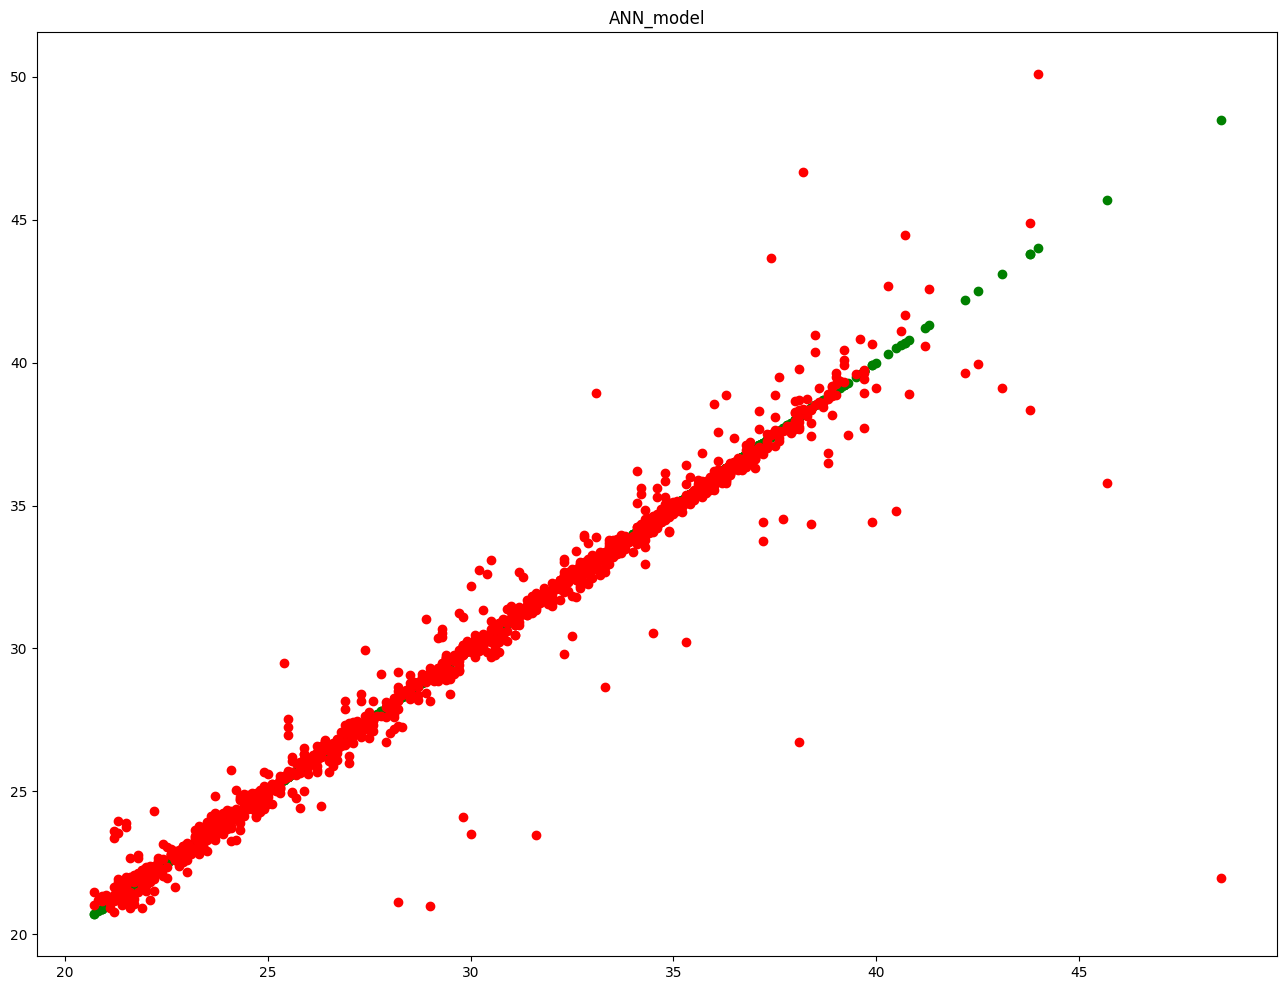

In [75]:
plt.figure(figsize=(16, 12))
plt.scatter(y_test, y_test, color="green")


plt.scatter(y_test, ann_ypred, color="red")


plt.title("ANN_model")

<H1>MULTIPLE LINEAR REGRESSION </H1>


In [40]:
from sklearn.linear_model import LinearRegression

MLR_model = LinearRegression()
MLR_model.fit(X_train, y_train)

LinearRegression()

In [41]:
mlr_ypred = MLR_model.predict(X_test)

In [42]:
mlr_MAE = mean_absolute_error(y_test, mlr_ypred)
mlr_MSE = mean_squared_error(y_test, mlr_ypred)
mlr_r2 = r2_score(y_test, mlr_ypred)
print("mean absolute error = ", mlr_MAE)
print("mean Squared error = ", mlr_MSE)
print("r2 score = ", mlr_r2)

mean absolute error =  0.44555733
mean Squared error =  1.5317998
r2 score =  0.9454034001306131


Text(0.5, 1.0, 'MLR_model')

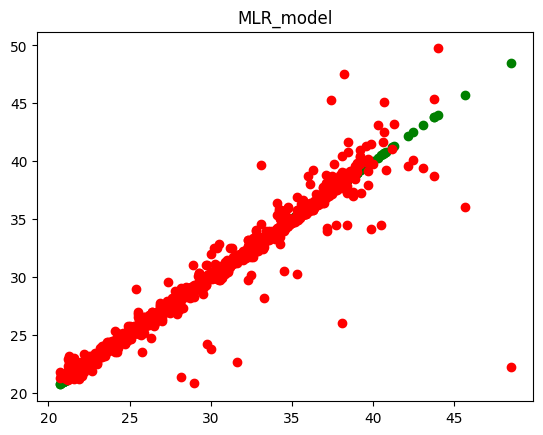

In [43]:
plt.scatter(y_test, y_test, color="green")
plt.scatter(y_test, mlr_ypred, color="red")
plt.title("MLR_model")

<h1>DECISION TREE REGRESSION </H1>


In [44]:
from sklearn.tree import DecisionTreeRegressor

# Increase maximum depth
DTR_model = DecisionTreeRegressor(
    max_depth=13, random_state=0, min_samples_split=20)

# Fine-tune hyperparameters
DTR_model.fit(X_train, y_train)

dtr_ypred = DTR_model.predict(X_test).reshape(-1, 1)

dtr_mae = mean_absolute_error(y_test, dtr_ypred)
dtr_mse = mean_squared_error(y_test, dtr_ypred)
dtr_r2 = r2_score(y_test, dtr_ypred)
print("mean absolute error = ", dtr_mae)
print("mean Squared error = ", dtr_mse)
print("r2 score = ", dtr_r2)

mean absolute error =  0.4374607185130605
mean Squared error =  2.230429472924248
r2 score =  0.920502750770314


Text(0.5, 1.0, 'DecisionTreeRegressor(max_depth=13, min_samples_split=20, random_state=0)')

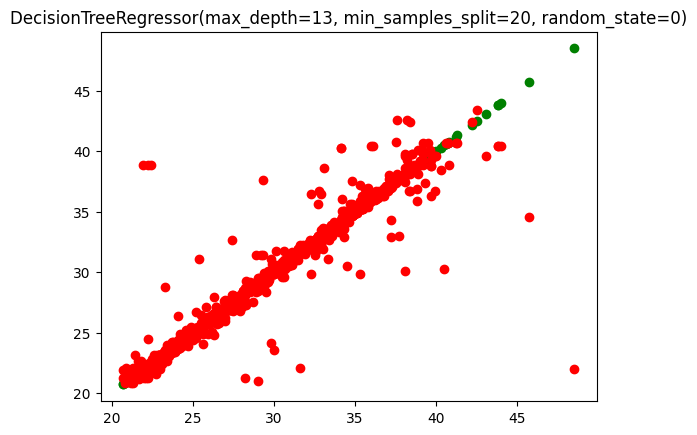

In [45]:
plt.scatter(y_test, y_test, color="green")
plt.scatter(y_test, dtr_ypred, color="red")
plt.title(DTR_model)

<h1>GRADIENT BOOSTING REGRESSOR </h1>

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor(
    learning_rate=0.2,
    max_depth=3,
    min_samples_leaf=4,
    min_samples_split=10,
    n_estimators=200,
)
GBR.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, min_samples_leaf=4,
                          min_samples_split=10, n_estimators=200)

In [47]:
gbr_ypred = GBR.predict(X_test)

In [48]:
print("mean_absolute_error = ", mean_absolute_error(y_test, gbr_ypred))
print("mean_squared_error = ", mean_squared_error(y_test, gbr_ypred))
print("r2 score = ", r2_score(y_test, gbr_ypred))

mean_absolute_error =  0.3867326507832522
mean_squared_error =  1.317894102673284
r2 score =  0.9530274517933122


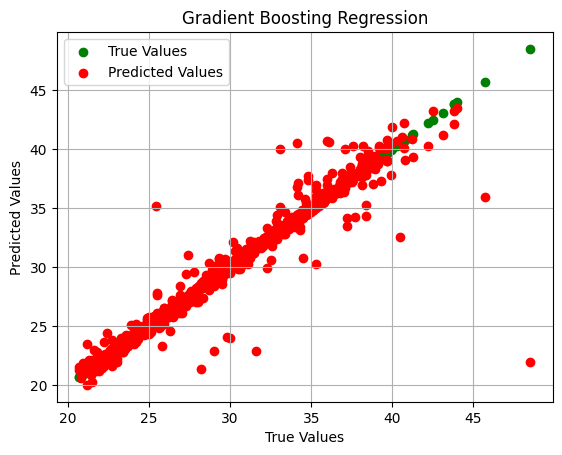

In [65]:
plt.scatter(y_test, y_test, color="green", label="True Values")
plt.scatter(y_test, gbr_ypred, color="red", label="Predicted Values")
plt.title("Gradient Boosting Regression")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

<h1>ENSEMBLE MODEL </h1>

In [50]:
DTR_predictions = DTR_model.predict(X_train).reshape(-1, 1)
GBR_predictions = GBR.predict(X_train).reshape(-1, 1)
ensemble_ypred_xtrain = np.mean([DTR_predictions, GBR_predictions], axis=0)

In [51]:
DTR_predictions = DTR_model.predict(X_test).reshape(-1, 1)
GBR_predictions = GBR.predict(X_test).reshape(-1, 1)

ensemble_ypred_xtest = np.mean([DTR_predictions, GBR_predictions], axis=0)

In [52]:
print("mean_absolute_error = ", mean_absolute_error(y_test, ensemble_ypred_xtest))
print("mean_squared_error = ", mean_squared_error(y_test, ensemble_ypred_xtest))
print("r2 score = ", r2_score(y_test, ensemble_ypred_xtest))

mean_absolute_error =  0.38499193305758567
mean_squared_error =  1.530482271778292
r2 score =  0.9454503573961215


Text(0.5, 1.0, 'ensemble')

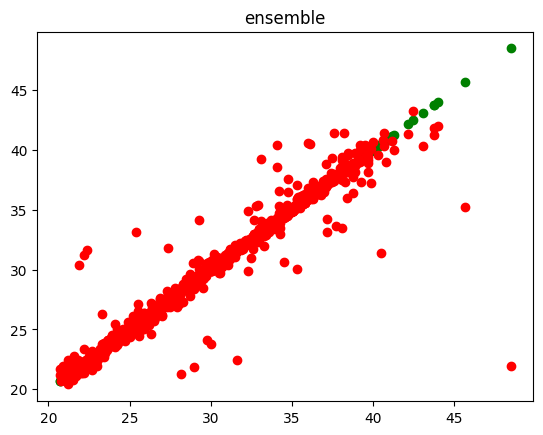

In [53]:
plt.scatter(y_test, y_test, color="green")
plt.scatter(y_test, ensemble_ypred_xtest, color="red")
plt.title("ensemble")

<h1>MODEL COMPARISON </H1>

In [54]:
def least_error(row):
    y_true = row[0]
    cols = ["ytest", "DTR", "MLR", "ANN", "GBR", "ensemble"]
    lowest = 1000
    least_err = "DTR"
    for i in range(1, len(cols)):
        diff = abs(y_true - row[i])
        if diff < lowest:
            lowest, least_err = diff, cols[i]
    return least_err

In [55]:
reshape = (-1, 1)
comp = np.concatenate(
    (
        y_test.reshape(reshape),
        dtr_ypred.reshape(reshape),
        mlr_ypred.reshape(reshape),
        ann_ypred.reshape(reshape),
        gbr_ypred.reshape(reshape),
        ensemble_ypred_xtest.reshape(reshape),
    ),
    1,
)


comparison = pd.DataFrame(
    comp, columns=["ytest", "DTR", "MLR", "ANN", "GBR", "ensemble"]
)
comparison["winner"] = comparison.apply(
    least_error, axis=1, result_type="expand", raw=True
)
comparison.to_csv("testing and results/model test comparison.csv")

In [56]:
reshape = (-1, 1)
comp = np.concatenate(
    (
        y_train.reshape(reshape),
        DTR_model.predict(X_train).reshape(reshape),
        MLR_model.predict(X_train).reshape(reshape),
        ANN_model.predict(X_train).reshape(reshape),
        GBR.predict(X_train).reshape(reshape),
        ensemble_ypred_xtrain.reshape(reshape),
    ),
    1,
)


comparison_train = pd.DataFrame(
    comp, columns=["ytest", "DTR", "MLR", "ANN", "GBR", "ensemble"]
)
comparison_train["winner"] = comparison_train.apply(
    least_error, axis=1, result_type="expand", raw=True
)
comparison_train.to_csv("testing and results/model train comparison.csv")

233/233 [==============================] - 0s 659us/step


In [57]:
comparison_train.winner.describe()

count     7445
unique       5
top        DTR
freq      2866
Name: winner, dtype: object

In [58]:
comparison.winner.describe()

count     1314
unique       5
top        DTR
freq       397
Name: winner, dtype: object

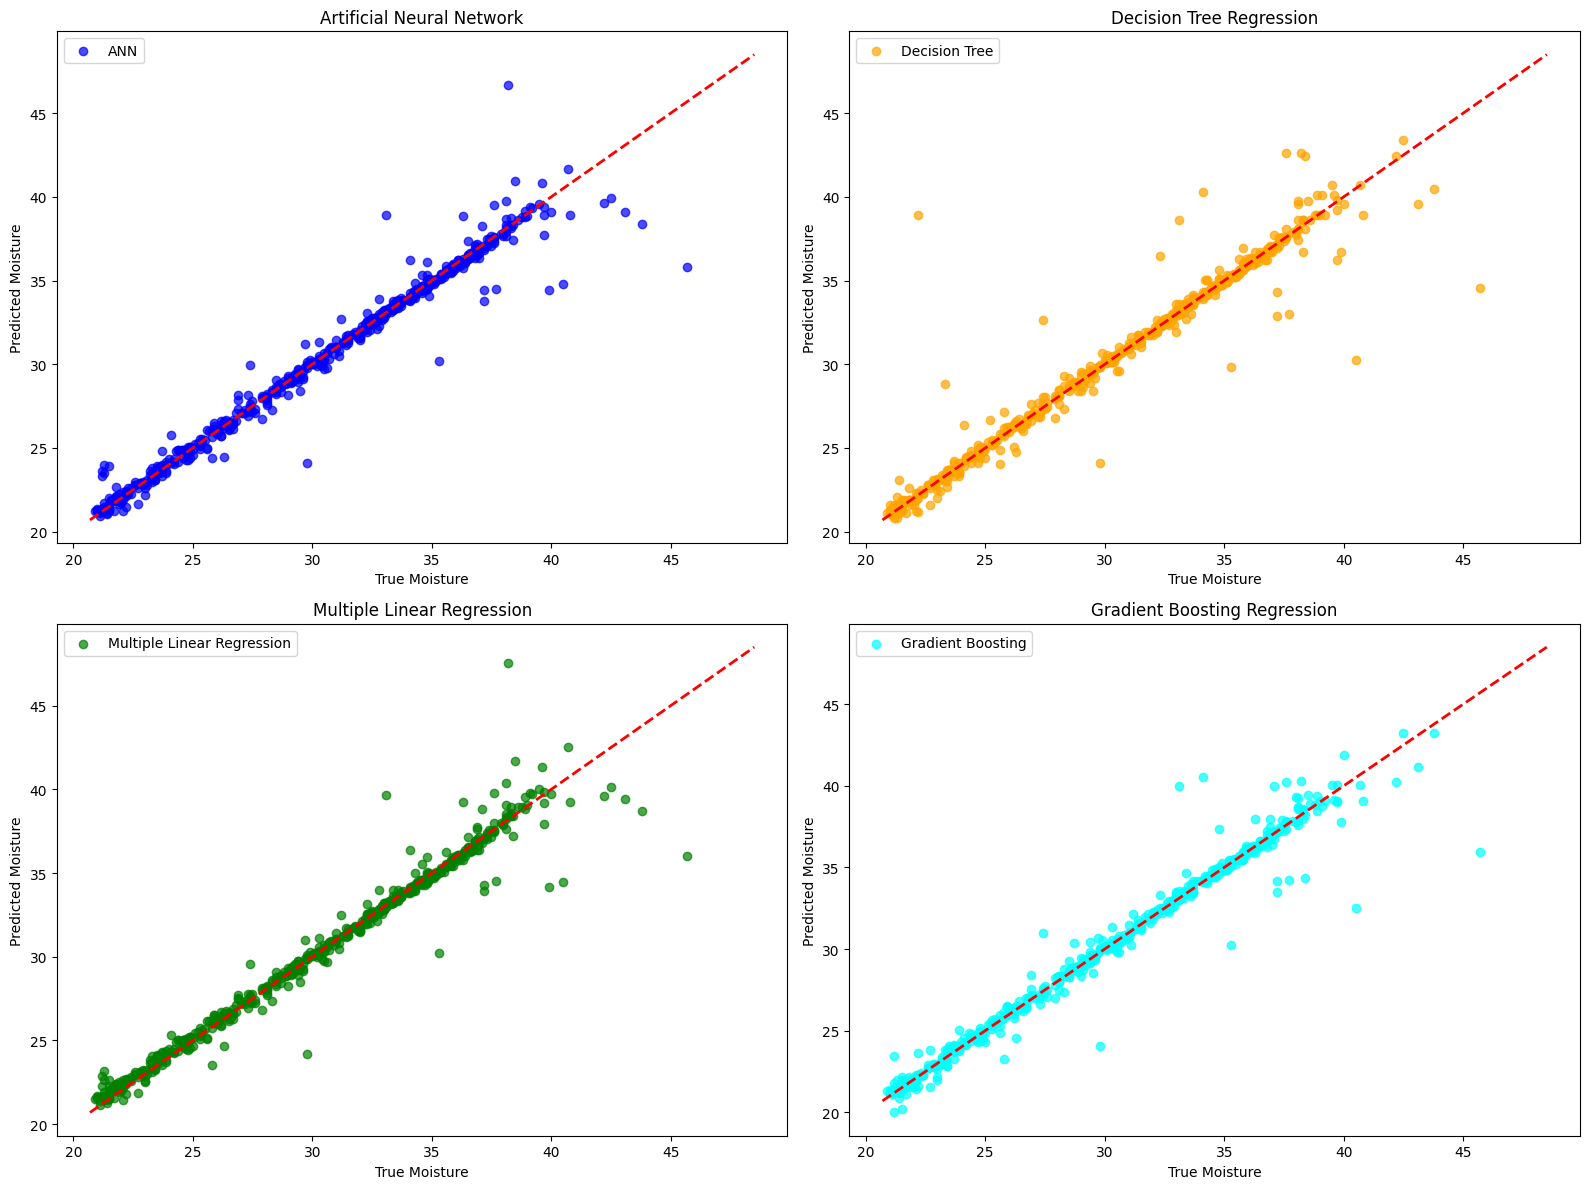

In [74]:
import matplotlib.pyplot as plt

# Assuming you have already defined y_test, ann_ypred, dtr_ypred, svr_ypred, and mlr_ypred

# Create a figure with a specific size
plt.figure(figsize=(16, 12))

# Subplot 1
plt.subplot(221)
plt.scatter(y_test[:600], ann_ypred[:600], color="blue", alpha=0.7, label="ANN")
plt.plot(
    [min(y_test), max(y_test)],
    [min(y_test), max(y_test)],
    "--",
    color="red",
    linewidth=2,
)
plt.title("Artificial Neural Network")
plt.xlabel("True Moisture")
plt.ylabel("Predicted Moisture")
plt.legend()

# Subplot 2
plt.subplot(222)
plt.scatter(
    y_test[:600], dtr_ypred[:600], color="orange", alpha=0.7, label="Decision Tree"
)
plt.plot(
    [min(y_test), max(y_test)],
    [min(y_test), max(y_test)],
    "--",
    color="red",
    linewidth=2,
)
plt.title("Decision Tree Regression")
plt.xlabel("True Moisture")
plt.ylabel("Predicted Moisture")
plt.legend()

# Subplot 3
plt.subplot(223)
plt.scatter(
    y_test[:600],
    mlr_ypred[:600],
    color="green",
    alpha=0.7,
    label="Multiple Linear Regression",
)
plt.plot(
    [min(y_test), max(y_test)],
    [min(y_test), max(y_test)],
    "--",
    color="red",
    linewidth=2,
)
plt.title("Multiple Linear Regression")
plt.xlabel("True Moisture")
plt.ylabel("Predicted Moisture")
plt.legend()

# Subplot 4
plt.subplot(224)
plt.scatter(
    y_test[:600], gbr_ypred[:600], color="aqua", alpha=0.7, label="Gradient Boosting"
)
plt.plot(
    [min(y_test), max(y_test)],
    [min(y_test), max(y_test)],
    "--",
    color="red",
    linewidth=2,
)
plt.title("Gradient Boosting Regression")
plt.xlabel("True Moisture")
plt.ylabel("Predicted Moisture")
plt.legend()

# # Subplot 5
# plt.subplot(235)
# plt.scatter(
#     y_test[:600],
#     ensemble_ypred_xtest[:600],
#     color="purple",
#     alpha=0.7,
#     label="Ensemble Model",
# )
# plt.plot(
#     [min(y_test), max(y_test)],
#     [min(y_test), max(y_test)],
#     "--",
#     color="red",
#     linewidth=2,
# )
# plt.title("Ensemble Model")
# plt.xlabel("True Moisture")
# plt.ylabel("Predicted Moisture")
# plt.legend()

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

<h1>SAVING MODELS</h1>

In [ ]:
import joblib


joblib.dump(ct, "final_model/moisture_pred_columntranformer.joblib")
joblib.dump(sc, "final_model/moisture_pred_minmaxscalar.joblib")


# Neural Network model
ANN_model.save(filepath="final_model/models/zeus.keras")


joblib.dump(DTR_model, filename="final_model/dtr.bin")  # Decision tree model


# Multiple linear regression model


joblib.dump(MLR_model, filename="final_model/models/mlrmodel.bin")


# Gradient boosting regressor

joblib.dump(GBR, filename="final_model/models/GBR.bin")